
# Project: Gapminder World

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Gapminder World 
Gapminder has collected lot of information about various aspects of people in different countries over years and have provided the information under various indicators. In this project, I have chosen 4 indicators - income per person GDP, urban population, population growth and forest area for people living in different countries from 1996 to 2016. I have chosen the data of years for these 4 indicators for every 5 years. (1996, 2001, 2006, 2011 and 2016)

**Income per person GDP** - It is the purchasing power of people (in international dollars, fixed 2011 prices)

**Urban Population** - Refers to the people living in urban areas

**Population growth** - Annual percentage population growth rate

**Forest Area** - This is the land area under planted or natural trees for 5 meters.

Questions 
1. How has the population growth rate increased/decreased from 1996 to 2016?
2. Relationship between urban population and population growth
3. Relationship between urban population and income per person GDP


In [1]:
#All packages planned to use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

The data for this project is available in different csv files. Each indicator is a csv file. So the best way to approach data analysis was to load the data, check if data cleaning is required and then merge the data into a final dataframe and then proceed with exploratory analysis.
Each indicator has different rows and columns size. Consider countries where most of the data is available in the recent few years.

In [2]:
# Loading income_gdp.csv file and making country the index column
df_income = pd.read_csv('income_gdp.csv', index_col =0)


In [3]:
df_income.shape

(193, 241)

In [4]:
#Loading life_expectancy.csv and makng country column the index
df_urban_population = pd.read_csv('urban_population.csv', index_col =0)


In [5]:
df_urban_population.shape

(193, 59)

In [6]:
#Loading population_growth.csv and making the country column index
df_population_growth = pd.read_csv('population_growth.csv', index_col =0)


In [7]:
df_population_growth.shape

(193, 59)

In [8]:
#Loading employment_rate.csv and making the country column as index
df_forest_area = pd.read_csv('forest_area.csv',index_col=0)



In [9]:
df_forest_area.shape

(193, 27)

The above data shows that there are data for each country for every year is provided for each indicator. All these file will need to be reshaped in order to merge and create a dataframe with all 4 indicators and then proceed with analysing each column and checking if further cleaning is required.


Let us consider 21 years of the data with an increment of 5 years from 1996 to 2016 including both the years(1996, 2001, 2006, 2011 and 2016) for all 4 indicators and proceed with cleaning the data. 

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_income = df_income[['1996','2001','2006','2011','2016']]
df_income.head(1)

,1996,2001,2006,2011,2016
country,,,,,
Afghanistan,942,646,1120,1630,1760


In [11]:
df_urban_population= df_urban_population[['1996','2001','2006','2011','2016']]
df_urban_population.head(1)

,1996,2001,2006,2011,2016
country,,,,,
Afghanistan,4090000,4790000,6060000,7210000,8850000.0


In [12]:
df_population_growth = df_population_growth[['1996','2001','2006','2011','2016']]
df_population_growth.head(1)

,1996,2001,2006,2011,2016
country,,,,,
Afghanistan,0.0402,0.039,0.0299,0.0314,0.0278


In [13]:
df_forest_area = df_forest_area[['1996','2001','2006','2011','2016']]
df_forest_area.head(1)

,1996,2001,2006,2011,2016
country,,,,,
Afghanistan,13500.0,13500.0,13500.0,13500.0,13500.0


In [14]:
#renaming years with underscore followed by first 3 letters of each indicator
df_income = df_income.rename(columns = lambda x: x+'_INC')
df_income.head(1)

,1996_INC,2001_INC,2006_INC,2011_INC,2016_INC
country,,,,,
Afghanistan,942,646,1120,1630,1760


In [15]:
df_urban_population = df_urban_population.rename(columns = lambda x: x+'_URB')
df_urban_population.head(1)

,1996_URB,2001_URB,2006_URB,2011_URB,2016_URB
country,,,,,
Afghanistan,4090000,4790000,6060000,7210000,8850000.0


In [16]:
df_population_growth = df_population_growth.rename(columns = lambda x: x+'_POP')
df_population_growth.head(1)

,1996_POP,2001_POP,2006_POP,2011_POP,2016_POP
country,,,,,
Afghanistan,0.0402,0.039,0.0299,0.0314,0.0278


In [17]:
df_forest_area= df_forest_area.rename(columns= lambda x: x+'_FOR')
df_forest_area.head(1)

,1996_FOR,2001_FOR,2006_FOR,2011_FOR,2016_FOR
country,,,,,
Afghanistan,13500.0,13500.0,13500.0,13500.0,13500.0


In [18]:
#Checking columns with null values
df_income.info() , df_urban_population.info(), df_population_growth.info(), df_forest_area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
1996_INC    193 non-null int64
2001_INC    193 non-null int64
2006_INC    193 non-null int64
2011_INC    193 non-null int64
2016_INC    193 non-null int64
dtypes: int64(5)
memory usage: 9.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
1996_URB    193 non-null int64
2001_URB    193 non-null int64
2006_URB    193 non-null int64
2011_URB    193 non-null int64
2016_URB    192 non-null float64
dtypes: float64(1), int64(4)
memory usage: 9.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
1996_POP    193 non-null float64
2001_POP    193 non-null float64
2006_POP    193 non-null float64
2011_POP    193 non-null float64
2016_POP    192 non-null float64
dtypes: float64(5)
memory usage: 9.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 193 e

(None, None, None, None)

In [19]:
#Converting urban population data type to float
df_urban_population = df_urban_population.iloc[:,:5].astype(float)

In [20]:
#Coverting income per person GDP data type to float
df_income = df_income.iloc[:,:5].astype(float)

In [21]:
#Fill 0 with NaN values in Urban Population, Population growth and Forest area
df_urban_population['2016_URB'] = df_urban_population['2016_URB'].fillna(0)
df_population_growth['2016_POP'] = df_population_growth['2016_POP'].fillna(0)
df_forest_area = df_forest_area.iloc[:,:5].fillna(0)


In [22]:
#Checking columns with null values
df_income.info() , df_urban_population.info(), df_population_growth.info(), df_forest_area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
1996_INC    193 non-null float64
2001_INC    193 non-null float64
2006_INC    193 non-null float64
2011_INC    193 non-null float64
2016_INC    193 non-null float64
dtypes: float64(5)
memory usage: 9.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
1996_URB    193 non-null float64
2001_URB    193 non-null float64
2006_URB    193 non-null float64
2011_URB    193 non-null float64
2016_URB    193 non-null float64
dtypes: float64(5)
memory usage: 9.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
1996_POP    193 non-null float64
2001_POP    193 non-null float64
2006_POP    193 non-null float64
2011_POP    193 non-null float64
2016_POP    193 non-null float64
dtypes: float64(5)
memory usage: 9.0+ KB
<class 'pandas.core.frame.DataFrame'>
In

(None, None, None, None)

All the data frames have 193 countries with non-null values and have the same datatype. Now all these dataframes have to be merged into a final dataframe. To do this, let us consider 2 dataframes at a time. Compare the countries and merge the remaining data.

In [23]:
#Merging Income per person GDP with Urban Population dataframes first
df_inc_urb = pd.merge(df_income,df_urban_population,left_index = True,right_index = True)

In [24]:
#Merging Population Growth and Forest Area dataframes
df_pop_for = pd.merge(df_population_growth,df_forest_area,left_index = True,right_index = True)

In [25]:
#Merging the above merged dataframes to give a final combined dataframe
df_combined = pd.merge(df_inc_urb,df_pop_for,left_index = True,right_index = True)

In [26]:
df_combined.head()

,1996_INC,2001_INC,2006_INC,2011_INC,2016_INC,1996_URB,2001_URB,2006_URB,2011_URB,2016_URB,1996_POP,2001_POP,2006_POP,2011_POP,2016_POP,1996_FOR,2001_FOR,2006_FOR,2011_FOR,2016_FOR
country,,,,,,,,,,,,,,,,,,,,
Afghanistan,942.0,646.0,1120.0,1630.0,1760.0,4090000.0,4790000.0,6060000.0,7210000.0,8850000.0,0.04020,0.03900,0.02990,0.03140,0.02780,13500.0,13500.0,13500.0,13500.0,13500.0
Albania,4530.0,5950.0,7910.0,10200.0,11400.0,1250000.0,1300000.0,1430000.0,1550000.0,1680000.0,-0.00622,-0.00938,-0.00631,-0.00269,-0.00160,7770.0,7720.0,7810.0,7750.0,7710.0
Algeria,9560.0,10400.0,12400.0,13000.0,13900.0,16600000.0,19100000.0,21700000.0,25000000.0,29000000.0,0.01750,0.01310,0.01470,0.01880,0.02050,16100.0,15700.0,16100.0,19300.0,19600.0
Andorra,27200.0,31800.0,42700.0,42000.0,48200.0,60100.0,62000.0,72700.0,74300.0,68200.0,0.00796,0.02940,0.02660,-0.00835,-0.00919,160.0,160.0,160.0,160.0,160.0
Angola,3750.0,3920.0,5500.0,6350.0,6260.0,6530000.0,8690000.0,11400000.0,14700000.0,18500000.0,0.03210,0.03300,0.03620,0.03630,0.03380,602000.0,596000.0,590000.0,584000.0,577000.0


In [27]:
#checking the combined dataframe and rearranging columns according to the years
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Afghanistan to Zimbabwe
Data columns (total 20 columns):
1996_INC    191 non-null float64
2001_INC    191 non-null float64
2006_INC    191 non-null float64
2011_INC    191 non-null float64
2016_INC    191 non-null float64
1996_URB    191 non-null float64
2001_URB    191 non-null float64
2006_URB    191 non-null float64
2011_URB    191 non-null float64
2016_URB    191 non-null float64
1996_POP    191 non-null float64
2001_POP    191 non-null float64
2006_POP    191 non-null float64
2011_POP    191 non-null float64
2016_POP    191 non-null float64
1996_FOR    191 non-null float64
2001_FOR    191 non-null float64
2006_FOR    191 non-null float64
2011_FOR    191 non-null float64
2016_FOR    191 non-null float64
dtypes: float64(20)
memory usage: 31.3+ KB


In [28]:
df_combined.sort_index(axis=1, inplace = True)

In [29]:
df_combined.head()

,1996_FOR,1996_INC,1996_POP,1996_URB,2001_FOR,2001_INC,2001_POP,2001_URB,2006_FOR,2006_INC,2006_POP,2006_URB,2011_FOR,2011_INC,2011_POP,2011_URB,2016_FOR,2016_INC,2016_POP,2016_URB
country,,,,,,,,,,,,,,,,,,,,
Afghanistan,13500.0,942.0,0.04020,4090000.0,13500.0,646.0,0.03900,4790000.0,13500.0,1120.0,0.02990,6060000.0,13500.0,1630.0,0.03140,7210000.0,13500.0,1760.0,0.02780,8850000.0
Albania,7770.0,4530.0,-0.00622,1250000.0,7720.0,5950.0,-0.00938,1300000.0,7810.0,7910.0,-0.00631,1430000.0,7750.0,10200.0,-0.00269,1550000.0,7710.0,11400.0,-0.00160,1680000.0
Algeria,16100.0,9560.0,0.01750,16600000.0,15700.0,10400.0,0.01310,19100000.0,16100.0,12400.0,0.01470,21700000.0,19300.0,13000.0,0.01880,25000000.0,19600.0,13900.0,0.02050,29000000.0
Andorra,160.0,27200.0,0.00796,60100.0,160.0,31800.0,0.02940,62000.0,160.0,42700.0,0.02660,72700.0,160.0,42000.0,-0.00835,74300.0,160.0,48200.0,-0.00919,68200.0
Angola,602000.0,3750.0,0.03210,6530000.0,596000.0,3920.0,0.03300,8690000.0,590000.0,5500.0,0.03620,11400000.0,584000.0,6350.0,0.03630,14700000.0,577000.0,6260.0,0.03380,18500000.0


In [30]:
#Save the combined and cleaned dataframe
df_combined.to_csv('df_combined', index = False)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 How has the population growth rate increased/decreased from 1996 to 2016?

Below a graph is plotted for the population growth rate for all 5 years. This graph plots the population growth rate against the number of countries. From the below graph it can be observed that the population growth rate appears skewed right for 2001, 2006 and 2011 and it appears to be a little skewed left for 1996 and 2016.

In [31]:
df_population_growth.describe()

,1996_POP,2001_POP,2006_POP,2011_POP,2016_POP
count,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.014956,0.014471,0.016115,0.014251,0.013725
std,0.013198,0.013293,0.019298,0.015258,0.012201
min,-0.036300,-0.038500,-0.016000,-0.026300,-0.030700
25%,0.005070,0.005360,0.005580,0.004360,0.005110
50%,0.015300,0.014000,0.013300,0.013000,0.012200
75%,0.024900,0.024000,0.024000,0.023900,0.022600
max,0.055100,0.052400,0.167000,0.092300,0.048500


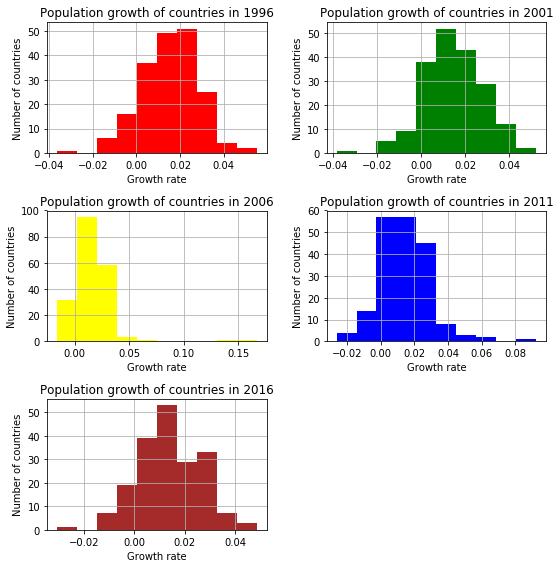

In [32]:

plt.subplot(3,2,1)
df_combined['1996_POP'].hist(figsize = (8,8), color = 'red')
plt.title('Population growth of countries in 1996')
plt.xlabel('Growth rate')
plt.ylabel('Number of countries')


plt.subplot(3,2,2)
df_combined['2001_POP'].hist(figsize = (8,8), color = 'green')
plt.title('Population growth of countries in 2001')
plt.xlabel('Growth rate')
plt.ylabel('Number of countries')


plt.subplot(3,2,3)
df_combined['2006_POP'].hist(figsize = (8,8), color = 'yellow')
plt.title('Population growth of countries in 2006')
plt.xlabel('Growth rate')
plt.ylabel('Number of countries')


plt.subplot(3,2,4)
df_combined['2011_POP'].hist(figsize = (8,8), color = 'blue')
plt.title('Population growth of countries in 2011')
plt.xlabel('Growth rate')
plt.ylabel('Number of countries')


plt.subplot(3,2,5)
df_combined['2016_POP'].hist(figsize = (8,8), color = 'brown')
plt.title('Population growth of countries in 2016')
plt.xlabel('Growth rate')
plt.ylabel('Number of countries')


plt.tight_layout()

From the graphs we can say that the global population growth rate was between 2% and 4% for more than 50 countries in 1996 and 2001. However, this growth rate has reduced to 0% and 2% for most countries in 2006, 2011 and 2016. Also, with time the negative population growth rate or the population decline rate has reduced over time. The population growth rate has skewed more to the right over time except in 1996 and 2016 it is skewed to the left.

Further, we can see the population growth rate for a country in particular. Let us consider Canada.

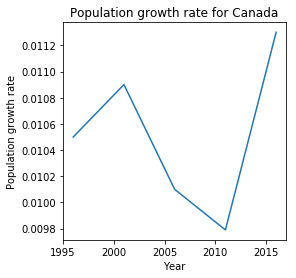

In [33]:
#population growth rate for Canada
df_population_growth.columns = [1996,2001,2006,2011,2016]
plt.title('Population growth rate for Canada')
plt.xlabel('Year')
plt.ylabel('Population growth rate')
df_population_growth.loc['Canada'].plot(figsize = (4,4));


The above graph shows how the population growth rate has changed for Canada from 1996 to 2016. The population growth decreased from 2001 to 2011 and increased between 2011 and 2016. This can be related to the income per person, urban population or forest area. We can see the relationship of population growth of Canada with other factors from the below graphs.

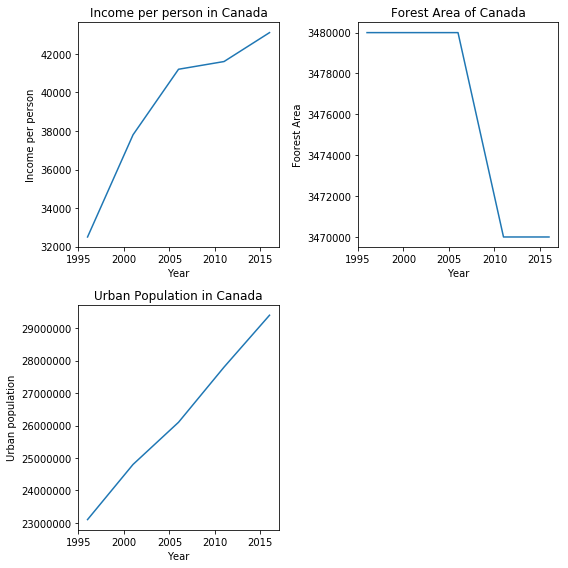

In [34]:
#Various other indicators for Canada

plt.subplot(2,2,1)
df_income.columns = [1996,2001,2006,2011,2016]
plt.title('Income per person in Canada')
plt.xlabel('Year')
plt.ylabel('Income per person')
df_income.loc['Canada'].plot(figsize = (8,8));

plt.subplot(2,2,2)
df_forest_area.columns = [1996,2001,2006,2011,2016]
plt.title('Forest Area of Canada')
plt.xlabel('Year')
plt.ylabel('Foorest Area')
df_forest_area.loc['Canada'].plot(figsize = (8,8));

plt.subplot(2,2,3)
df_urban_population.columns = [1996,2001,2006,2011,2016]
plt.title('Urban Population in Canada')
plt.xlabel('Year')
plt.ylabel('Urban population')
df_urban_population.loc['Canada'].plot(figsize = (8,8));
plt.ticklabel_format(useOffset=False, style = 'plain')

plt.tight_layout()

The population growth rate seems to inversely related to forest area for Canada. But it is difficult to interpret the relationship with income per person GDP and urban population. We can investigate the relationship of these indicators in the following questions.

### Research Question 2  Is there a relationship between Urban Population and Population growth?

To understand this relationship, we have understand the relationship of Urban population and population growth for each year considered in the dataset. We can consider using scatter plots to understand the coorelation of the two indicators.


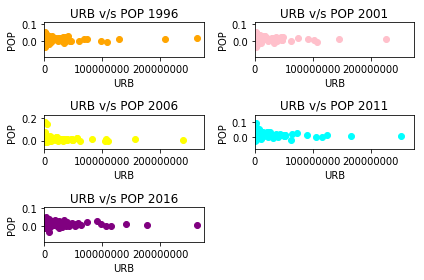

In [35]:
# Urban population and population growth rate for each year
plt.subplot(3,2,1)
plt.scatter(x=df_combined['1996_URB'],y=df_combined['1996_POP'], color = 'orange');
plt.title('URB v/s POP 1996')
plt.xlabel('URB')
plt.xlim([0,275000000])
plt.ticklabel_format(useOffset=False, style = 'plain')
plt.ylabel('POP')

plt.subplot(3,2,2)
plt.scatter(x=df_combined['2001_URB'],y=df_combined['2001_POP'], color = 'pink');
plt.title('URB v/s POP 2001')
plt.xlabel('URB')
plt.xlim([0,275000000])
plt.ticklabel_format(useOffset=False, style = 'plain')
plt.ylabel('POP')

plt.subplot(3,2,3)
plt.scatter(x=df_combined['2006_URB'],y=df_combined['2006_POP'], color = 'yellow');
plt.title('URB v/s POP 2006')
plt.xlabel('URB')
plt.xlim([0,275000000])
plt.ticklabel_format(useOffset=False, style = 'plain')
plt.ylabel('POP')

plt.subplot(3,2,4)
plt.scatter(x=df_combined['2011_URB'],y=df_combined['2011_POP'],color = 'cyan');
plt.title('URB v/s POP 2011')
plt.xlabel('URB')
plt.xlim([0,275000000])
plt.ticklabel_format(useOffset=False, style = 'plain')
plt.ylabel('POP')

plt.subplot(3,2,5)
plt.scatter(x=df_combined['2016_URB'],y=df_combined['2016_POP'],color = 'purple');
plt.title('URB v/s POP 2016')
plt.xlabel('URB')
plt.xlim([0,275000000])
plt.ticklabel_format(useOffset=False, style = 'plain')
plt.ylabel('POP')

plt.tight_layout()

In [77]:
#Function to find and print the correlation coefficient for all years of urban population and population growth
def correl(x,y, year):
    coeff = np.corrcoef(x,y)
    print( "The coefficient of correlation between urban population and population growth rate in "+ year + " was "+ str(coeff))

In [78]:
correl(df_combined['1996_URB'],df_combined['1996_POP'], str(1996))
correl(df_combined['2001_URB'],df_combined['2001_POP'], str(2001))
correl(df_combined['2006_URB'],df_combined['2006_POP'], str(2006))
correl(df_combined['2011_URB'],df_combined['2011_POP'], str(2011))
correl(df_combined['2016_URB'],df_combined['2016_POP'], str(2011))

The coefficient of correlation between urban population and population growth rate in 1996 was [[ 1.         -0.06295396]
 [-0.06295396  1.        ]]
The coefficient of correlation between urban population and population growth rate in 2001 was [[ 1.         -0.07942963]
 [-0.07942963  1.        ]]
The coefficient of correlation between urban population and population growth rate in 2006 was [[ 1.         -0.08352241]
 [-0.08352241  1.        ]]
The coefficient of correlation between urban population and population growth rate in 2011 was [[ 1.         -0.07961754]
 [-0.07961754  1.        ]]
The coefficient of correlation between urban population and population growth rate in 2011 was [[ 1.         -0.08428436]
 [-0.08428436  1.        ]]


From the graph it feels like there is a strong coorelation at the begining but with very high urban population the correlation is weak. Also, it can be seen that they are negatively correlated with highest negative correlation in 2016.

### Research Question 3  Is there a relationship between Urban Population and income per person GDP?

Similar to the previous question, plot the graph of urban population and income per person GDP for each year to understand the correlation. 

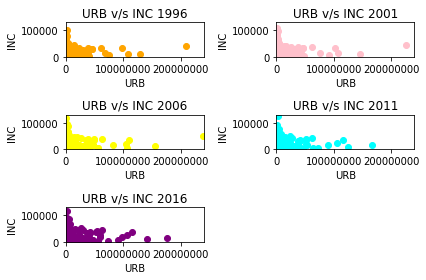

In [72]:
plt.subplot(3,2,1)
plt.scatter(x=df_combined['1996_URB'],y=df_combined['1996_INC'], color = 'orange');
plt.title('URB v/s INC 1996')
plt.xlabel('URB')
plt.xlim([0,240000000])
plt.ylim([0,130000])
plt.ticklabel_format(useOffset=False, style = 'plain')
plt.ylabel('INC')

plt.subplot(3,2,2)
plt.scatter(x=df_combined['2001_URB'],y=df_combined['2001_INC'], color = 'pink');
plt.title('URB v/s INC 2001')
plt.xlabel('URB')
plt.xlim([0,240000000])
plt.ylim([0,130000])
plt.ticklabel_format(useOffset=False, style = 'plain')
plt.ylabel('INC')

plt.subplot(3,2,3)
plt.scatter(x=df_combined['2006_URB'],y=df_combined['2006_INC'], color = 'yellow');
plt.title('URB v/s INC 2006')
plt.xlabel('URB')
plt.xlim([0,240000000])
plt.ylim([0,130000])
plt.ticklabel_format(useOffset=False, style = 'plain')
plt.ylabel('INC')

plt.subplot(3,2,4)
plt.scatter(x=df_combined['2011_URB'],y=df_combined['2011_INC'],color = 'cyan');
plt.title('URB v/s INC 2011')
plt.xlabel('URB')
plt.xlim([0,240000000])
plt.ylim([0,130000])
plt.ticklabel_format(useOffset=False, style = 'plain')
plt.ylabel('INC')

plt.subplot(3,2,5)
plt.scatter(x=df_combined['2016_URB'],y=df_combined['2016_INC'],color = 'purple');
plt.title('URB v/s INC 2016')
plt.xlabel('URB')
plt.xlim([0,240000000])
plt.ylim([0,130000])
plt.ticklabel_format(useOffset=False, style = 'plain')
plt.ylabel('INC')

plt.tight_layout()

In [73]:
#function to find and print the correlation coefficients for all years of urban population and income per person GDP
def correl(x,y, year):
    coeff = np.corrcoef(x,y)
    print( "The coefficient of correlation between urban population and income per person GDP in "+ year+ " was "+ str(coeff))

In [74]:
correl(df_combined['1996_URB'],df_combined['1996_INC'], str(1996))
correl(df_combined['2001_URB'],df_combined['2001_INC'], str(2001))
correl(df_combined['2006_URB'],df_combined['2006_INC'], str(2006))
correl(df_combined['2011_URB'],df_combined['2011_INC'], str(2011))
correl(df_combined['2016_URB'],df_combined['2016_INC'], str(2011))

The coefficient of correlation between urban population and income per person GDP in 1996 was [[ 1.          0.02379066]
 [ 0.02379066  1.        ]]
The coefficient of correlation between urban population and income per person GDP in 2001 was [[ 1.          0.01192565]
 [ 0.01192565  1.        ]]
The coefficient of correlation between urban population and income per person GDP in 2006 was [[ 1.         0.0037251]
 [ 0.0037251  1.       ]]
The coefficient of correlation between urban population and income per person GDP in 2011 was [[ 1.          0.01302216]
 [ 0.01302216  1.        ]]
The coefficient of correlation between urban population and income per person GDP in 2011 was [[ 1.          0.01798975]
 [ 0.01798975  1.        ]]


It can be observed that the scatter plot suggests a strong correlation between urban population and income per person GDP. They are positively correlated and the correlation coefficient has increased each year. The highest correlation coefficient was in 2016.

<a id='conclusions'></a>
## Conclusions
The global population growth rate from 1996 to 2016 was observed from the graphs. A country could be selected and its population growth rate could be analyzed for the same timeframe. In the above analysis Canada was considered to analyze the population growth where the population growth rate declined between 1996 and 2011 and later increased from 2011 to 2016. Further, graphs were plotted for other indicators of Canada to see if they were factors influencing the population growth. As conclusions couldn't be drawn, further investigations were made to understand the relationship between urban population and population growth rate, also between urban population and income per person GDP. 
It was found that urban population and population growth rate were negatively correlated and urban population and income per person GDP were positively coorelated.

**Limitations**: This dataset considers only 5 years of data for all 4 indicators. Analysis are being carried out only based on these indicators where as the gapminder data set has various indicators and factors influencing the trends may include other indicators which are beyound the scope of this dataset.


In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0